For all numerical experiments, we will be using the Chambolle-Pock primal-dual algorithm - details can be found on:
1. [A First-order Primal-dual Algorithm for Convex Problems with Applications to Imaging](https://link.springer.com/article/10.1007/s10851-010-0251-1), A. Chambolle, T. Pock, Journal of Mathematical Imaging and Vision (2011). [PDF](https://hal.archives-ouvertes.fr/hal-00490826/document)
2. [Recovering Piecewise Smooth Multichannel Images by Minimization of Convex Functionals with Total Generalized Variation Penalty](https://link.springer.com/chapter/10.1007/978-3-642-54774-4_3), K. Bredies, Efficient algorithms for global optimization methods in computer vision (2014). [PDF](https://imsc.uni-graz.at/mobis/publications/SFB-Report-2012-006.pdf)
3. [Second Order Total Generalized Variation (TGV) for MRI](https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.22595), F. Knoll, K. Bredies, T. Pock, R. Stollberger (2010). [PDF](https://onlinelibrary.wiley.com/doi/epdf/10.1002/mrm.22595)

In order to compute the spatia dependent regularization weights we follow:

4. [Dualization and Automatic Distributed Parameter Selection of Total Generalized Variation via Bilevel Optimization](https://arxiv.org/pdf/2002.05614.pdf), M. Hintermüller, K. Papafitsoros, C.N. Rautenberg, H. Sun, arXiv preprint, (2020)

# Huber Total Variation Denoising

We are solving the discretized version of the following minimization problem
\begin{equation}\label{L2-TV}
\min_{u} \int_{\Omega} (u-f)^{2}dx + \alpha \int_{\Omega}  \varphi_{\gamma}(\nabla u)dx
\end{equation}
were $\phi_{\gamma}:\mathbb{R}^{d}\to \mathbb{R}^{+}$ with 
\begin{equation}
\phi_{\gamma}(v)=
\begin{cases}
|v|-\frac{1}{2}\gamma & \text{ if } |v|\ge \gamma,\\
\frac{1}{2\gamma}|v(x)|^{2}& \text{ if } |v|< \gamma.\\
\end{cases}
\end{equation}







## Import data...

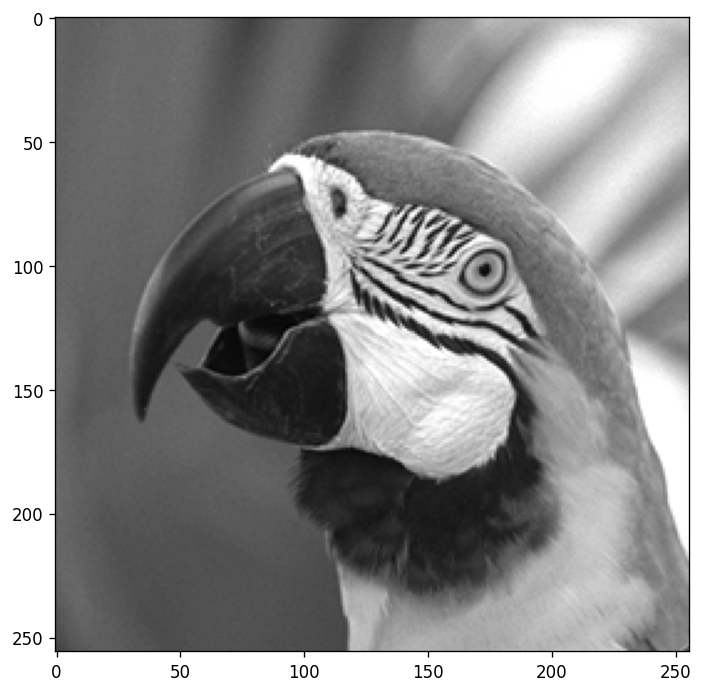

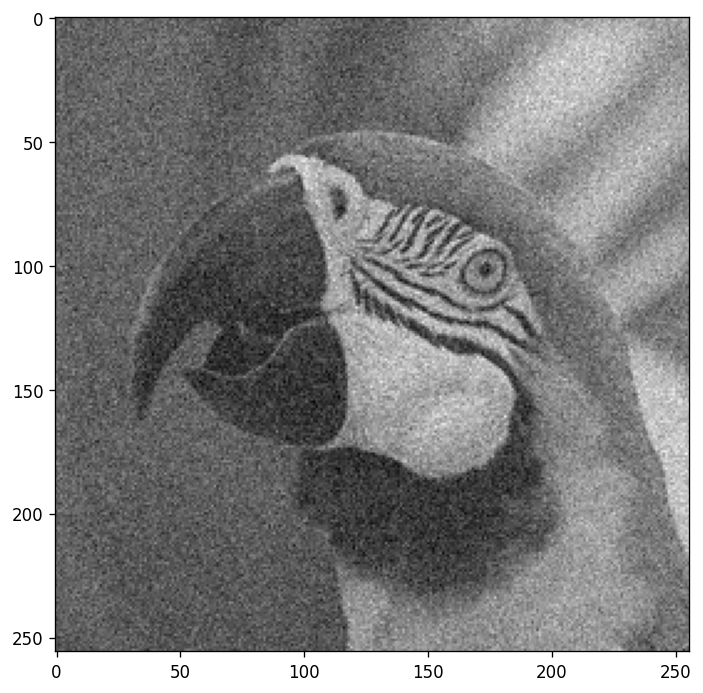

In [31]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

mat_contents = sio.loadmat('parrot')
clean=mat_contents['parrot']
f=mat_contents['parrot_noisy_01']

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(clean)
imgplot2.set_cmap('gray')

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(f)
imgplot2.set_cmap('gray')

from Tutorial_Codes import psnr, reproject, dxm, dym, dxp, dyp, function_TGV_denoising_CP, P_a_Huber, function_HuberTV_denoising_CP


## Task 1

Choose different values for $\alpha$ and $\gamma$ and interprent your results:
- Fix $\gamma$ small, e.g. $\gamma=0.01$ and play with the values of $\alpha$. What do you observe for large $\alpha$? What for small?
- Fix $\alpha$ and play with the values of $\gamma$. What do you observe for large $\gamma$? What for small?


Iteration  100 : The PSNR is 29.24
Iteration  200 : The PSNR is 29.23
Iteration  300 : The PSNR is 29.23
Iteration  400 : The PSNR is 29.23
Iteration  500 : The PSNR is 29.23
Iteration  600 : The PSNR is 29.23
Iteration  700 : The PSNR is 29.22
Iteration  800 : The PSNR is 29.22
Iteration  900 : The PSNR is 29.22
Iteration  1000 : The PSNR is 29.22


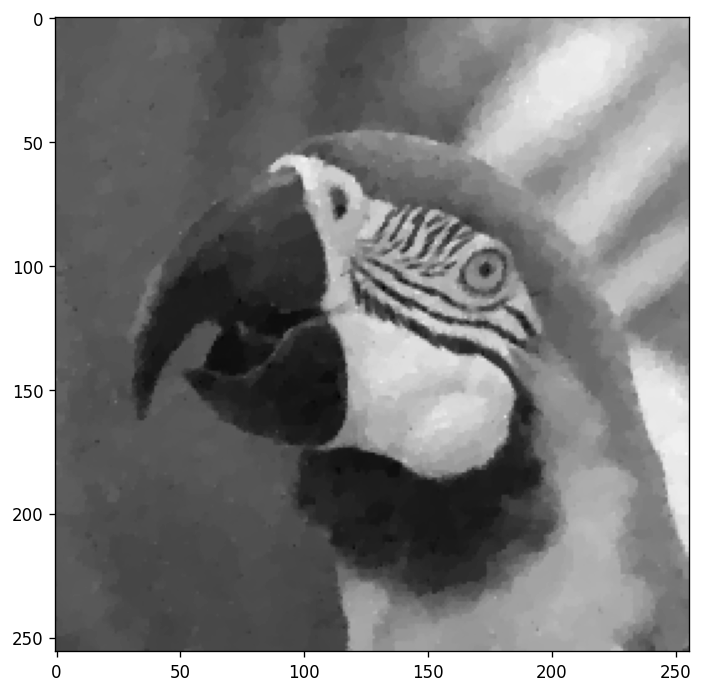

In [32]:
alpha=0.085
gamma=0.001
uTV =  function_HuberTV_denoising_CP(f,clean, alpha, gamma,1000)

Iteration  100 : The PSNR is 25.54
Iteration  200 : The PSNR is 25.53
Iteration  300 : The PSNR is 25.53
Iteration  400 : The PSNR is 25.53
Iteration  500 : The PSNR is 25.53
Iteration  600 : The PSNR is 25.53
Iteration  700 : The PSNR is 25.53
Iteration  800 : The PSNR is 25.52
Iteration  900 : The PSNR is 25.52
Iteration  1000 : The PSNR is 25.52


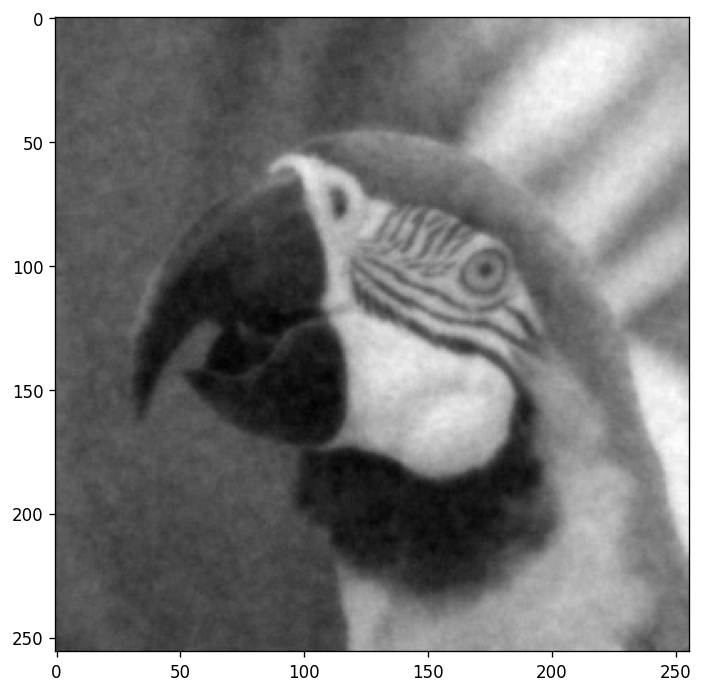

In [33]:
uTikhonov =  function_HuberTV_denoising_CP(f,clean, 5, 2,1000)

# Total Generalized Variation Denoising

We are solving the discretized version of the following minimization problem
\begin{equation}\label{L2-TGV}
\min_{u} \int_{\Omega} (u-f)^{2}dx + TGV_{\alpha,\beta}(u)
\end{equation}

where 
\begin{equation}
TGV_{\alpha,\beta}(u)=\min_{w} \alpha \int_{\Omega}  |\nabla u-w|dx + \beta \int_{\Omega} |Ew|dx
\end{equation}

## Task 2a

Choose different values for $\alpha$ and $\beta$ and solve the TGV denoising minimization problem.

- What happens for small $\alpha$ and large $\beta$?
- What happens for large $\alpha$ and small $\beta$?
- What happens where both parameters are small/large?
- Try to find the combination of parameters that gives the highest PSNR value.

Iteration  100 : The PSNR is 29.37
Iteration  200 : The PSNR is 29.44
Iteration  300 : The PSNR is 29.46
Iteration  400 : The PSNR is 29.47
Iteration  500 : The PSNR is 29.47


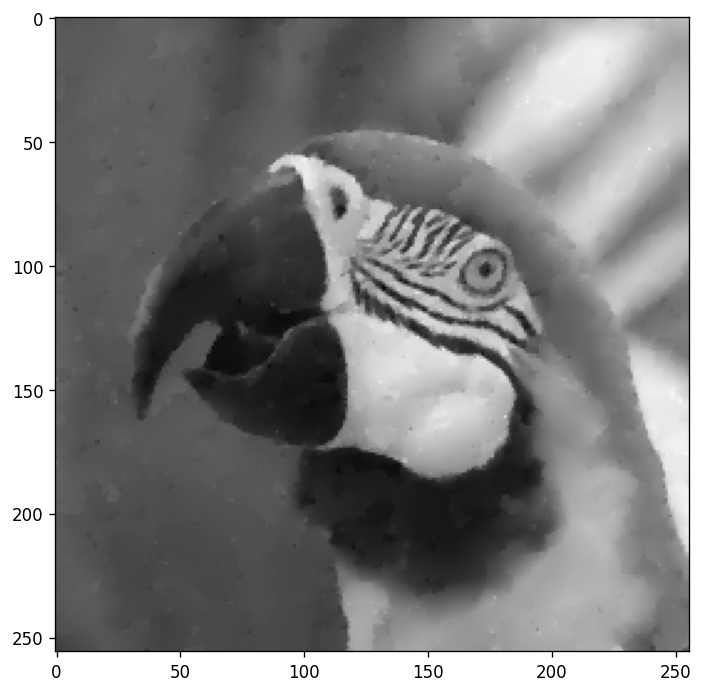

In [34]:
#alpha=0.085
#beta=0.15

alpha=0.085
beta=0.15

uTGV =  function_TGV_denoising_CP(f,clean, alpha, beta, 500)

## Task 2b

Import the following spatial dependent regularization weights, which are taken from this work:

- [Dualization and Automatic Distributed Parameter Selection of Total Generalized Variation via Bilevel Optimization](https://arxiv.org/pdf/2002.05614.pdf), M. Hintermüller, K. Papafitsoros, C.N. Rautenberg, H. Sun, arXiv preprint, (2020)

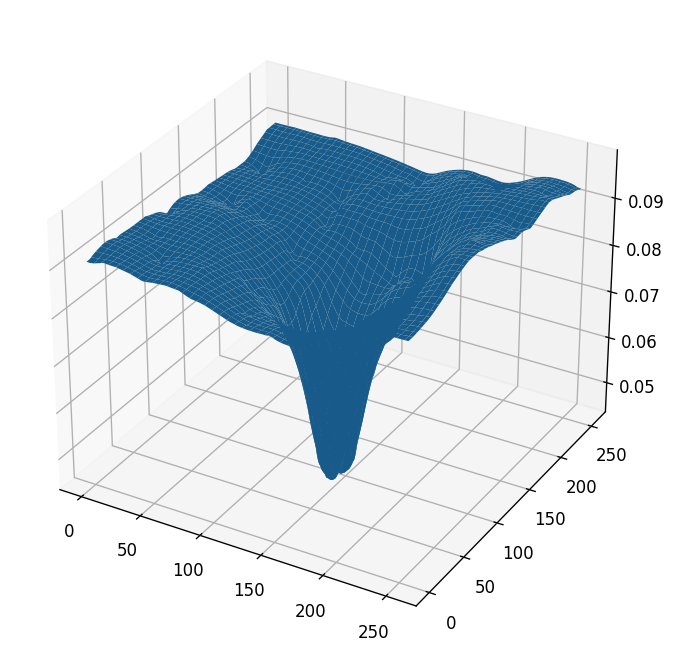

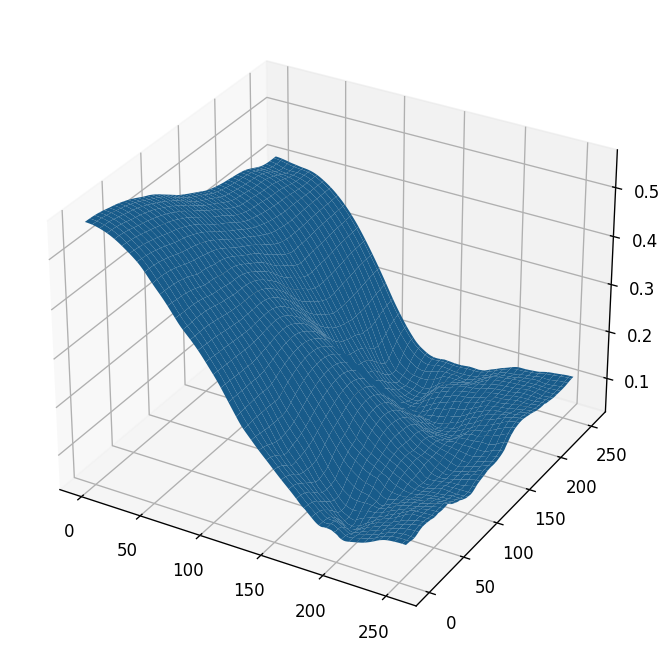

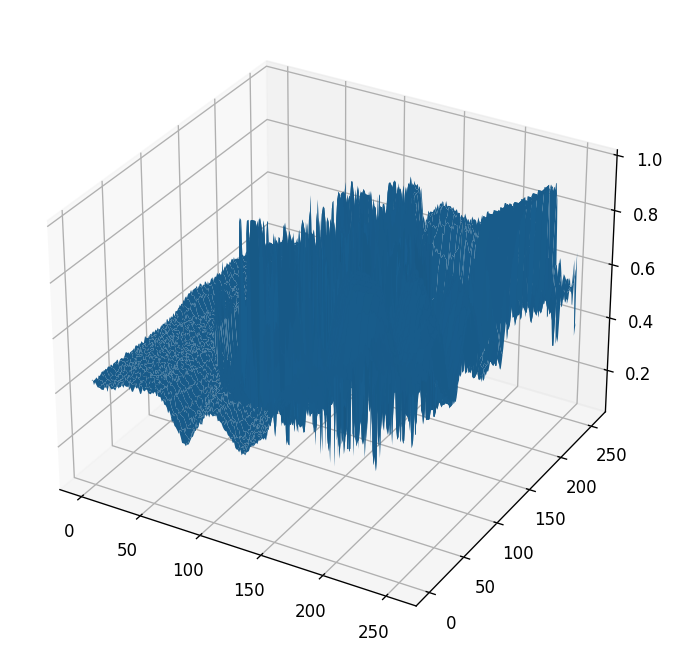

In [35]:
weight_contents = sio.loadmat('spatial_dependent_weights')
alpha_spatial=weight_contents['TGV_alpha_spatial']
beta_spatial=weight_contents['TGV_beta_spatial']

#plt.figure(figsize = (7,7)) 
#imgplot2 = plt.imshow(alpha_spatial)
#imgplot2.set_cmap('gray')

#plt.figure(figsize = (7,7)) 
#imgplot2 = plt.imshow(beta_spatial)
#imgplot2.set_cmap('gray')

from mpl_toolkits.mplot3d import Axes3D

(n,m)=alpha_spatial.shape
x=range(n)
y=range(m)
X, Y = np.meshgrid(x, y) 
halpha = plt.figure(figsize = (7,7))
h_alpha = halpha.add_subplot(111, projection='3d')
h_alpha.plot_surface(X, Y, alpha_spatial)

hbeta = plt.figure(figsize = (7,7))
h_beta = hbeta.add_subplot(111, projection='3d')
h_beta.plot_surface(X, Y, beta_spatial)

hclean = plt.figure(figsize = (7,7))
h_clean = hclean.add_subplot(111, projection='3d')
h_clean.plot_surface(X, Y, clean)

And run again the algorithm with this weight:

Iteration  100 : The PSNR is 29.77
Iteration  200 : The PSNR is 29.83
Iteration  300 : The PSNR is 29.85
Iteration  400 : The PSNR is 29.85
Iteration  500 : The PSNR is 29.86


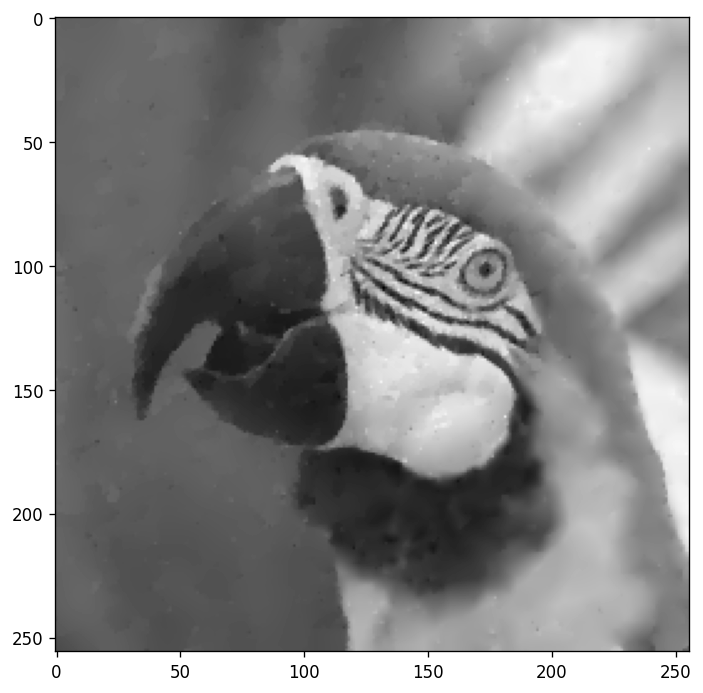

In [36]:
uTGVspatial =  function_TGV_denoising_CP(f,clean, alpha_spatial, beta_spatial, 500)

Now you can see all the reconstructions together:


[Text(0.5, 0, 'TGV spatial, PSNR = 29.86')]

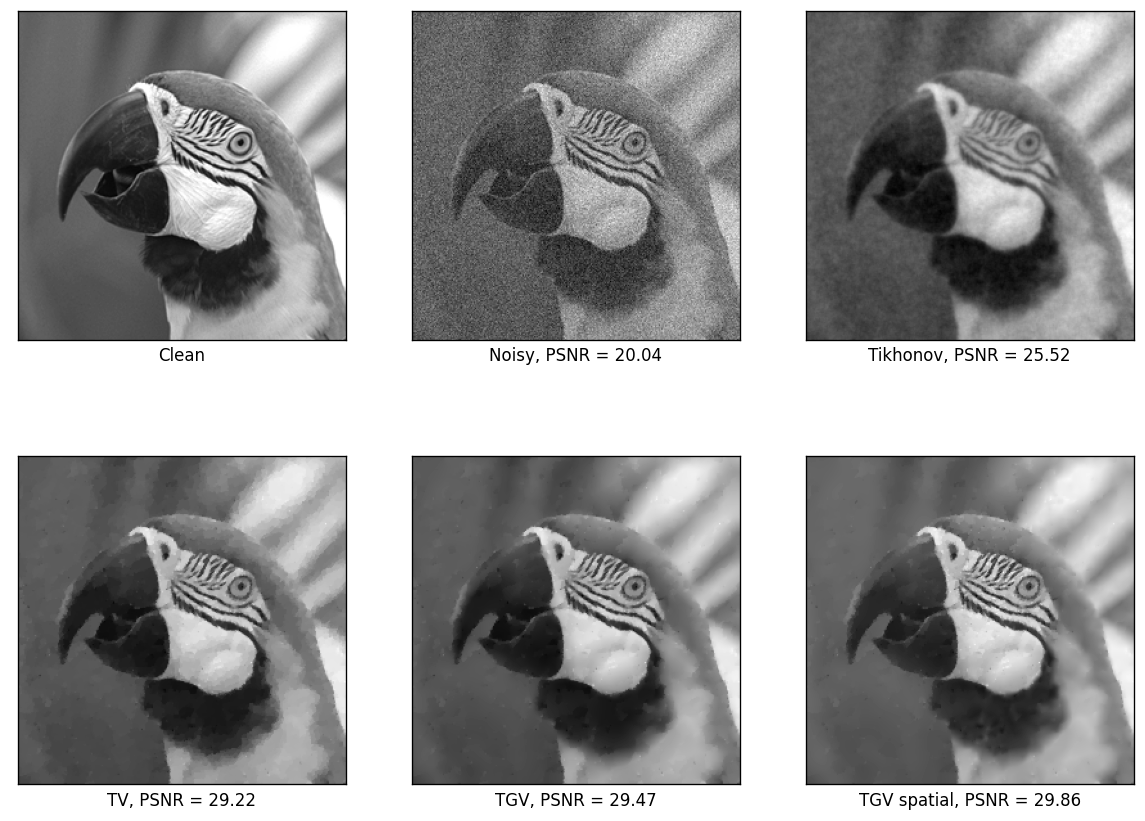

In [41]:
plt.rcParams['figure.figsize'] = np.array([4, 3])*3
plt.rcParams['figure.dpi'] = 120
fig, axs = plt.subplots(ncols=3, nrows=2)


# remove ticks from plot
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

axs[0,0].imshow(clean, cmap='gray')
axs[0,0].set(xlabel='Clean')    
    
axs[0,1].imshow(f, cmap='gray')
axs[0,1].set(xlabel='Noisy, PSNR = ' + str(np.around(psnr(f, clean),decimals=2)))

axs[0,2].imshow(uTikhonov, cmap='gray')
axs[0,2].set(xlabel='Tikhonov, PSNR = ' + str(np.around(psnr(uTikhonov, clean),decimals=2)))


axs[1,0].imshow(uTV, cmap='gray')
axs[1,0].set(xlabel='TV, PSNR = ' + str(np.around(psnr(uTV, clean),decimals=2)))


axs[1,1].imshow(uTGV, cmap='gray')
axs[1,1].set(xlabel = 'TGV, PSNR = ' + str(np.around(psnr(uTGV, clean),decimals=2)))

axs[1,2].imshow(uTGVspatial, cmap='gray')
axs[1,2].set(xlabel = 'TGV spatial, PSNR = ' + str(np.around(psnr(uTGVspatial, clean),decimals=2)))

# TV and TGV MRI reconstruction

Here we will be solving the discretized version of the following minimization problem
\begin{equation}
\min_{u} \int_{\Omega} (S \circ F u-g)^{2}dx + \alpha TV(u)
\end{equation}
and 
\begin{equation}
\min_{u} \int_{\Omega} (S \circ F u-g)^{2}dx + TGV_{\alpha,\beta}(u)
\end{equation}

The code for the examples below was kindly provided by Clemens Sirotenko.

## Import data

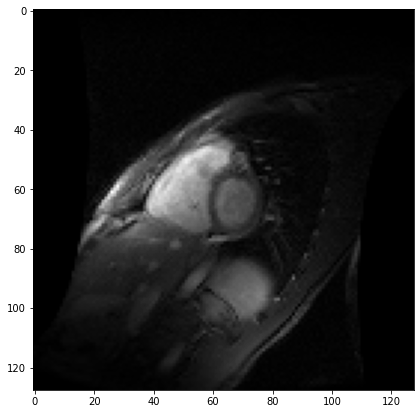

In [2]:
from Tutorial_Codes import normalize, subsampling, subsampling_transposed, compute_differential_operators, function_TV_MRI_CP, function_TGV_MRI_CP 
from scipy import sparse
import scipy.sparse.linalg

image=np.load('img_example.npy')
image=np.abs(image[:,:,3])
image = normalize(image)

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(image)
imgplot2.set_cmap('gray')



## Simulate noisy data and subsampled data

Create noisy data $ S \circ F x  + \varepsilon = y^{\delta}$ where $x$ is th clean image and $ \varepsilon \sim \mathcal{N}(0,\sigma^2)$ normal distributed centered complex noise

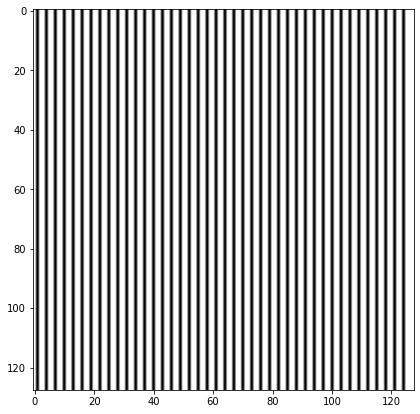

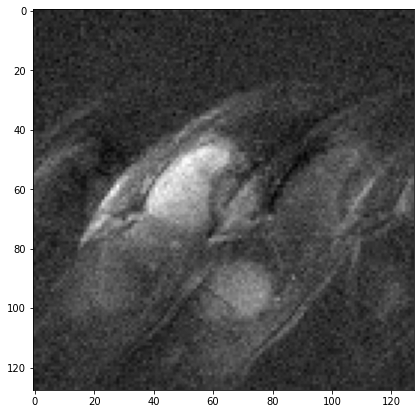

In [3]:
mask = np.ones(np.shape(image))
mask[:,1:-1:3] = 0

Fx = np.fft.fft2(image,norm='ortho') #ortho means that the fft2 is unitary
(M,N) = image.shape
rate = 0.039 ##noise rate
noise = np.random.randn(M,N) + (1j)*np.random.randn(M,N) #cmplx noise
distorted_full = Fx + rate*noise 
distorted = subsampling(distorted_full, mask)
zero_filling = np.real(np.fft.ifft2(subsampling_transposed(distorted, mask), norm = 'ortho'))

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(mask)
imgplot2.set_cmap('gray')

plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(zero_filling)
imgplot2.set_cmap('gray')

## TV MRI reconstruction

In [4]:
x_0 = zero_filling
data = distorted
alpha = 0.025
tau = 1/np.sqrt(12)
sigma = tau
h = 1 
max_it = 3000
tol = 1e-4 # algorithm stops if |x_k - x_{k+1}| < tol
x_TV = function_TV_MRI_CP(data,image,mask,x_0,tau,sigma,h,max_it,tol,alpha)

Iteration  100 : The PSNR is 32.85
Iteration  200 : The PSNR is 32.90
Iteration  300 : The PSNR is 32.89


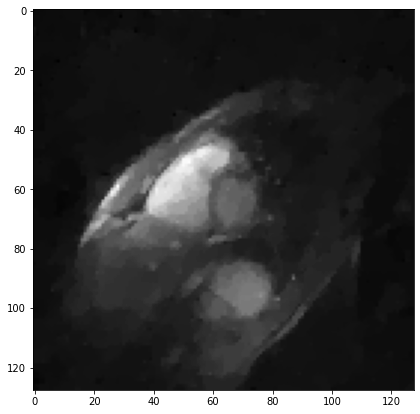

In [5]:
plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(x_TV)
imgplot2.set_cmap('gray')

## TGV MRI reconstruction

In [28]:
alpha = 0.02
beta = 0.035

x_0 = zero_filling
data = distorted
tau = 1/np.sqrt(12)
sigma = tau
lambda_prox = 1
h = 1 
tol = 1e-4
max_it = 2500
x_TGV = function_TGV_MRI_CP(data,image, mask,x_0,tau,sigma,lambda_prox,h,max_it,tol,beta,alpha)

Iteration  100 : The PSNR is 31.88
Iteration  200 : The PSNR is 32.64
Iteration  300 : The PSNR is 32.79
Iteration  400 : The PSNR is 32.75
Iteration  500 : The PSNR is 32.68
Iteration  600 : The PSNR is 32.64
Iteration  700 : The PSNR is 32.62
Iteration  800 : The PSNR is 32.62
Iteration  900 : The PSNR is 32.63
Iteration  1000 : The PSNR is 32.64
Iteration  1100 : The PSNR is 32.65
Iteration  1200 : The PSNR is 32.66


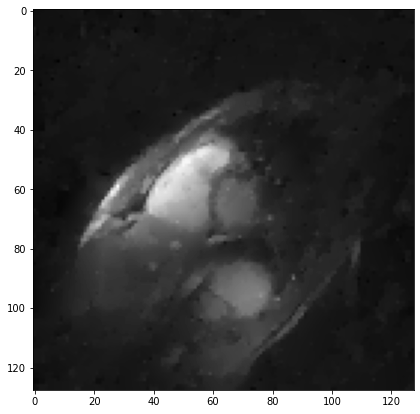

In [29]:
plt.figure(figsize = (7,7)) 
imgplot2 = plt.imshow(x_TGV)
imgplot2.set_cmap('gray')

Now you can see all the reconstructions together:

[Text(0.5, 0, 'TGV Reconstruction , PSNR = 32.66')]

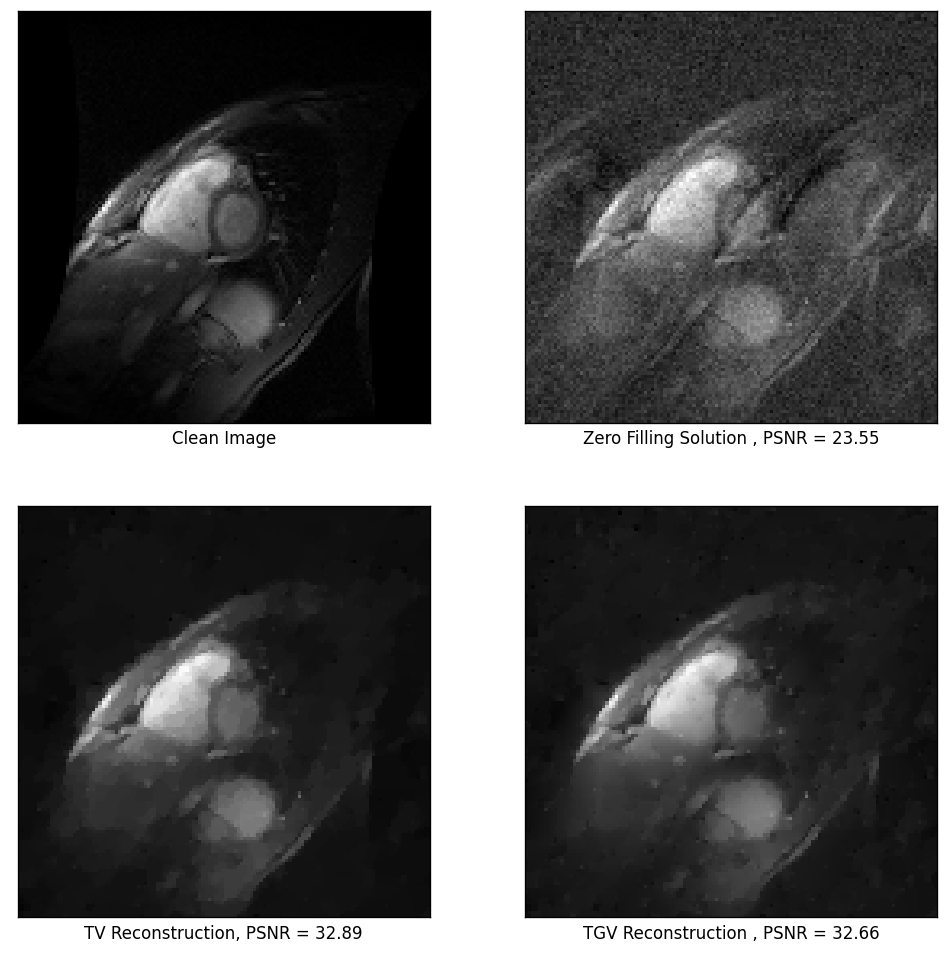

In [42]:
plt.rcParams['figure.figsize'] = np.array([2, 2])*5
plt.rcParams['figure.dpi'] = 120
fig, axs = plt.subplots(ncols=2, nrows=2)


# remove ticks from plot
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

axs[0,0].imshow(normalize(image), cmap='gray')
axs[0,0].set(xlabel='Clean Image')

axs[1,0].imshow(normalize(x_TV), cmap='gray')
axs[1,0].set(xlabel='TV Reconstruction, PSNR = ' + str(np.around(psnr(x_TV, image),decimals=2)))

axs[0,1].imshow(normalize(x_0), cmap='gray')
axs[0,1].set(xlabel = 'Zero Filling Solution , PSNR = ' + str(np.around(psnr(x_0, image),decimals=2)))

axs[1,1].imshow(normalize(x_TGV), cmap='gray')
axs[1,1].set(xlabel='TGV Reconstruction , PSNR = ' + str(np.around(psnr(x_TGV, image),decimals=2)))




